# 1. Local Outlier Factor (LOF)


**Pengertian LOF:**  
Local Outlier Factor (LOF) adalah algoritma yang digunakan untuk mendeteksi anomali atau outlier dalam dataset. LOF mengukur tingkat keanehan suatu data berdasarkan kepadatan lokalnya dibandingkan dengan data tetangganya. Jika suatu data memiliki kerapatan yang jauh lebih rendah dibandingkan tetangganya, maka data tersebut dianggap outlier.

**Kelebihan LOF:**
- Mampu mendeteksi outlier lokal yang tersembunyi dalam cluster.
- Tidak bergantung pada asumsi distribusi data tertentu.
- Cocok untuk data berdimensi tinggi.
- Dapat beradaptasi dengan berbagai bentuk distribusi data.

**Kekurangan LOF:**
- Sensitif terhadap pemilihan parameter $k$ (jumlah tetangga).
- Waktu komputasi tinggi untuk dataset besar.
- Sulit diinterpretasikan jika dimensi data terlalu banyak.
- Rentan terhadap outlier ekstrem jika jumlah tetangga tidak diatur dengan tepat.

## 2. Contoh Kasus LOF


Misalkan kita memiliki data pasien dengan hasil pemeriksaan dua variabel: *Tekanan Darah* dan *Detak Jantung*. Kita akan mendeteksi outlier menggunakan LOF dengan $k = 3$.

### Tabel Data Pasien
| Pasien | Tekanan Darah | Detak Jantung |
|-------|----------------|---------------|
| P1    | 120            | 80            |
| P2    | 130            | 85            |
| P3    | 110            | 78            |
| P4    | 125            | 83            |
| P5    | 140            | 90            |
| P6    | 200            | 150           |
| P7    | 118            | 79            |
| P8    | 135            | 87            |
| P9    | 210            | 155           |
| P10   | 128            | 82            |

P6 dan P9 adalah outlier karena memiliki nilai yang jauh berbeda dari data lainnya.

## 3. Langkah-langkah Perhitungan LOF ($k=3$) hitungan manual

### 1. Menghitung jarak Euclidean antar pasien

Rumus Euclidean distance:

$$
d(P_a, P_b) = \sqrt{(TekananDarah_a - TekananDarah_b)^2 + (DetakJantung_a - DetakJantung_b)^2}
$$
berikut tabelnya

| x,y  | p1    | p2    | p3    | p4    | p5    | p6    | p7    | p8    | p9    | p10   |
|------|-------|-------|-------|-------|-------|-------|-------|-------|-------|-------|
| p1   | 0.00  | 11.18 | 10.20 | 5.83  | 22.36 | 106.30| 2.24  | 16.55 | 117.15| 8.25  |
| p2   | 11.18 | 0.00  | 21.19 | 5.39  | 11.18 | 95.52 | 13.42 | 5.39  | 106.30| 3.61  |
| p3   | 10.20 | 21.19 | 0.00  | 15.81 | 32.31 | 115.26| 8.06  | 26.57 | 126.21| 18.44 |
| p4   | 5.83  | 5.39  | 15.81 | 0.00  | 16.55 | 100.57| 8.06  | 10.77 | 111.40| 3.16  |
| p5   | 22.36 | 11.18 | 32.31 | 16.55 | 0.00  | 84.85 | 24.60 | 5.83  | 95.52 | 14.42 |
| p6   | 106.30| 95.52 | 115.26| 100.57| 84.85 | 0.00  | 108.47| 90.52 | 11.18 | 99.04 |
| p7   | 2.24  | 13.42 | 8.06  | 8.06  | 24.60 | 108.47| 0.00  | 18.79 | 119.33| 10.44 |
| p8   | 16.55 | 5.39  | 26.57 | 10.77 | 5.83  | 90.52 | 18.79 | 0.00  | 101.24| 8.60  |
| p9   | 117.15| 106.30| 126.21| 111.40| 95.52 | 11.18 | 119.33| 101.24| 0.00  | 109.79|
| p10  | 8.25  | 3.61  | 18.44 | 3.16  | 14.42 | 99.04 | 10.44 | 8.60  | 109.79| 0.00  |


### 2. Menentukan k-distance

$k$-distance untuk setiap titik adalah jarak ke tetangga terdekat ke-$k$
Contoh untuk P1:
- Jarak ke P7: 2.24
- Jarak ke P4: 5.83
- Jarak ke P10: 8.25

$k$-distance untuk P1 = 8.25

tabel tetangga

| p/k | p1 | p2  | p3 | p4  | p5  | p6 | p7 | p8  | p9 | p10 |
|-----|----|-----|----|-----|-----|----|----|-----|----|-----|
| k1  | p7 | p10 | p7 | p10 | p8  | p9 | p1 | p2  | p6 | p4  |
| k2  | p4 | p3  | p1 | p2  | p2  | p5 | p3 | p5  | p5 | p2  |
| k3  | p10 | p6  | p4 | p1  | p10 | p8 | p4 | p10 | p8 | p1  |


berikut tabelnya

| p/k | p1   | p2   | p3    | p4   | p5    | p6    | p7   | p8   | p9     | p10  |
| --- | ---- | ---- | ----- | ---- | ----- | ----- | ---- | ---- | ------ | ---- |
| k1  | 2,24 | 3,61 | 8,06  | 3,16 | 5,83  | 11,18 | 2,24 | 5,39 | 11,18  | 3,16 |
| k2  | 5,83 | 5,39 | 10,20 | 5,39 | 11,18 | 84,85 | 8,06 | 5,83 | 95,52  | 3,61 |
| k3  | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |



### 3. Menghitung Reachability Distance (RD)

Rumus:

$$
RD_k(P_a, P_b) = \max\{k\text{-distance}(P_b), d(P_a, P_b)\}
$$

Contoh untuk P1 dan P2:
- $k$-distance(P2) = 8.25
- $d(P1, P2) = 8.25$
- $RD_k(P1, P2) = \max(8.25, 8.25) = 8.25$

berikut tabel RD

| p/p | p1   | p2   | p3    | p4   | p5    | p6    | p7   | p8   | p9     | p10  |
|-----|------|------|-------|------|-------|-------|------|------|--------|------|
| p1  | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |
| p2  | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |
| p3  | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |
| p4  | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |
| p5  | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |
| p6  | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |
| p7  | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |
| p8  | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |
| p9  | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |
| p10 | 8,25 | 5,39 | 15,81 | 5,83 | 14,42 | 90,52 | 8,06 | 8,60 | 101,24 | 8,25 |


### 4. Menghitung Local Reachability Density (LRD)

LRD untuk $P_a$ dihitung sebagai berikut:

$$
LRD(P_a) = \frac{1}{\frac{\sum_{P_b \in N_k(P_a)} RD_k(P_a, P_b)}{k}}
$$


berikut tabel perhitungan LRD

| p   | tetangga  | Sum RD (∑RD) | LRD (k / ∑RD) |
|-----|-----------|--------------|---------------|
| p1  | p7,p4,p10 | 16,32        | 0,183823529   |
| p2  | p10,p3,p6 | 14,39        | 0,20847811    |
| p3  | p7,p1,p4  | 34,07        | 0,088054006   |
| p4  | p10,p2,p1 | 14,38        | 0,208623088   |
| p5  | p8,p2,p10 | 31,43        | 0,095450207   |
| p6  | p9,p5,p8  | 186,55       | 0,016081479   |
| p7  | p1,p3,p4  | 18,36        | 0,163398693   |
| p8  | p2,p5,p10 | 19,82        | 0,15136226    |
| p9  | p6,p5,p8  | 207,94       | 0,014427239   |
| p10 | p4,p2,p1  | 15,02        | 0,199733688   |



### 5. Menghitung Local Outlier Factor (LOF)

Rumus:

$$
LOF(P_a) = \frac{\sum_{P_b \in N_k(P_a)} \frac{LRD(P_b)}{LRD(P_a)}}{k}
$$



- Jika LOF $>$ 1: data tersebut adalah outlier.
- Jika LOF $\approx$ 1: data tersebut bukan outlier.

### Tabel Perhitungan LOF

| p   | tetangga  | Σ (LRD tetangga / LRD p) | LOF (Σ / k) |
|-----|-----------|--------------------------|-------------|
| p1  | p7,p4,p10 | 3,110349751              | 1,03678325  |
| p2  | p10,p3,p6 | 0,499503214              | 0,166501071 |
| p3  | p7,p1,p4  | 6,312549902              | 2,104183301 |
| p4  | p10,p2,p1 | 3,882553063              | 1,294184354 |
| p5  | p8,p2,p10 | 5,862470887              | 1,954156962 |
| p6  | p9,p5,p8  | 16,2447557               | 5,414918568 |
| p7  | p1,p3,p4  | 2,940663816              | 0,980221272 |
| p8  | p2,p5,p10 | 3,32752698               | 1,10917566  |
| p9  | p6,p5,p8  | 17,18790941              | 5,729303138 |
| p10 | p4,p2,p1  | 3,008629799              | 1,0028766   |

berikut merupakan hasil perhitungan di exel

[perhitungan manual data pasien](https://docs.google.com/spreadsheets/d/1g8D-lI6DcASHflHwje9GIFr6TxHuoT5p/edit?usp=sharing&ouid=116026049394161582648&rtpof=true&sd=true)

## 4. Visualisasi

Untuk mempermudah analisis, berikut adalah visualisasi distribusi data dan nilai LOF:








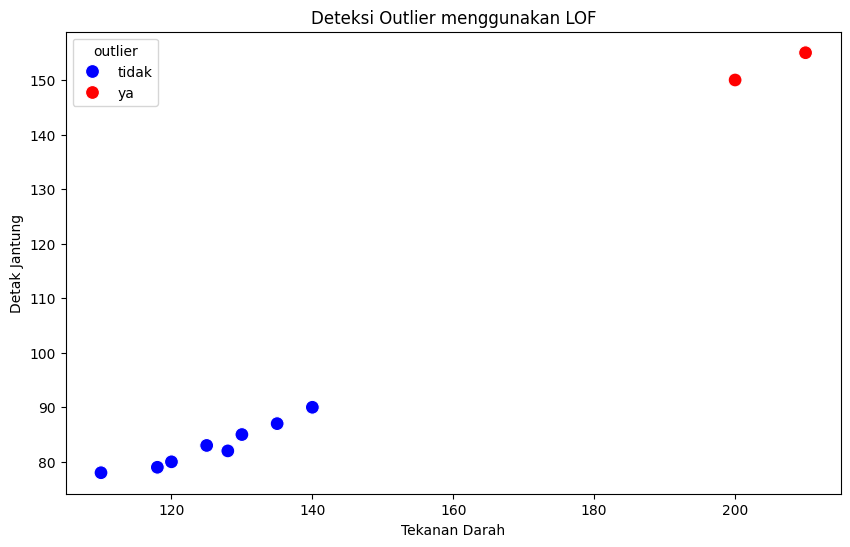

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
pasien_manual = ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10']
tekanan_darah = [120, 130, 110, 125, 140, 200, 118, 135, 210, 128]
detak_jantung = [80, 85, 78, 83, 90, 150, 79, 87, 155, 82]
outlier = ['tidak' if p not in ['P6', 'P9'] else 'ya' for p in pasien_manual]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=tekanan_darah, y=detak_jantung, hue=outlier, palette={'tidak': 'blue', 'ya': 'red'}, s=100)
plt.title('Deteksi Outlier menggunakan LOF')
plt.xlabel('Tekanan Darah')
plt.ylabel('Detak Jantung')
plt.legend(title='outlier')
plt.show()

Visualisasi ini menunjukkan bahwa P6 dan P9 memiliki jarak yang signifikan dari kelompok data lainnya, memperkuat hasil perhitungan LOF.

## hitungan code manual tanpa library scikit-learen
berikut merupakan perhitungan lof dengan code manual tanpa library

In [14]:
import numpy as np
import pandas as pd
from tabulate import tabulate

data = np.array([
    [120, 80], [130, 85], [110, 78], [125, 83], [140, 90],
    [200, 150], [118, 79], [135, 87], [210, 155], [128, 82]
])

# Fungsi menghitung jarak Euclidean
def euclidean_dist(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# Menghitung jarak antara setiap titik
print("Jarak Euclidean antara pasien:")
for i, point1 in enumerate(data):
    for j, point2 in enumerate(data):
        if i != j:
            print(f"P{i+1} ke P{j+1}: {euclidean_dist(point1, point2)}")



Jarak Euclidean antara pasien:
P1 ke P2: 11.180339887498949
P1 ke P3: 10.198039027185569
P1 ke P4: 5.830951894845301
P1 ke P5: 22.360679774997898
P1 ke P6: 106.30145812734649
P1 ke P7: 2.23606797749979
P1 ke P8: 16.55294535724685
P1 ke P9: 117.15374513859982
P1 ke P10: 8.246211251235321
P2 ke P1: 11.180339887498949
P2 ke P3: 21.18962010041709
P2 ke P4: 5.385164807134504
P2 ke P5: 11.180339887498949
P2 ke P6: 95.524865872714
P2 ke P7: 13.416407864998739
P2 ke P8: 5.385164807134504
P2 ke P9: 106.30145812734649
P2 ke P10: 3.605551275463989
P3 ke P1: 10.198039027185569
P3 ke P2: 21.18962010041709
P3 ke P4: 15.811388300841896
P3 ke P5: 32.31098884280702
P3 ke P6: 115.25623627379127
P3 ke P7: 8.06225774829855
P3 ke P8: 26.570660511172846
P3 ke P9: 126.21014222319853
P3 ke P10: 18.439088914585774
P4 ke P1: 5.830951894845301
P4 ke P2: 5.385164807134504
P4 ke P3: 15.811388300841896
P4 ke P5: 16.55294535724685
P4 ke P6: 100.56838469419701
P4 ke P7: 8.06225774829855
P4 ke P8: 10.770329614269007
P

In [15]:
# Menghitung k-distance dan k-neighbors
def k_distance_and_neighbors(data, point, k):
    distances = [np.linalg.norm(point - other) for other in data]
    sorted_indices = np.argsort(distances)
    k_neighbors = data[sorted_indices[1:k+1]]  # Hindari jarak ke dirinya sendiri
    k_dist = distances[sorted_indices[k]]
    return k_dist, k_neighbors

# Menghitung dan menampilkan k-distance
print("\nK-Distance untuk setiap pasien (k=3):")
k_distances = []
for i, point in enumerate(data):
    k_dist, neighbors = k_distance_and_neighbors(data, point, k=3)
    k_distances.append(round(k_dist, 2))
    print(f"P{i+1}: K-Distance = {k_dist}")





K-Distance untuk setiap pasien (k=3):
P1: K-Distance = 8.246211251235321
P2: K-Distance = 5.385164807134504
P3: K-Distance = 15.811388300841896
P4: K-Distance = 5.830951894845301
P5: K-Distance = 14.422205101855956
P6: K-Distance = 90.52071586106685
P7: K-Distance = 8.06225774829855
P8: K-Distance = 8.602325267042627
P9: K-Distance = 101.23734488813898
P10: K-Distance = 8.246211251235321


In [16]:
# Menghitung reachability distance (RD)
def reachability_dist(k_dist, dist):
    return max(k_dist, dist)

# Menghitung local reachability density (LRD)
def local_reachability_density(data, point, k=3):
    k_dist, neighbors = k_distance_and_neighbors(data, point, k)
    rd_sum = 0
    for neighbor in neighbors:
        neighbor_k_dist, _ = k_distance_and_neighbors(data, neighbor, k)
        dist = euclidean_dist(point, neighbor)
        rd_sum += reachability_dist(neighbor_k_dist, dist)
    return k / rd_sum if rd_sum != 0 else 0

# Menampilkan RD untuk setiap pasien
rd_values = []
print("\nReachability Distance (RD) untuk setiap pasien (k=3):")
for i, point in enumerate(data):
    k_dist, neighbors = k_distance_and_neighbors(data, point, k=3)
    for j, neighbor in enumerate(neighbors):
        dist = euclidean_dist(point, neighbor)
        rd = reachability_dist(k_dist, dist)
        rd_values.append(round(rd, 2))
        print(f"P{i+1} ke Neighbor P{j+1}: RD = {rd}")

# Menampilkan LRD untuk setiap pasien
lrd_values = []
print("\nLocal Reachability Density (LRD) untuk setiap pasien (k=3):")
for i, point in enumerate(data):
    lrd = local_reachability_density(data, point, k=3)
    lrd_values.append(round(lrd, 2))
    print(f"P{i+1}: LRD = {lrd}")

# Menghitung Local Outlier Factor (LOF)
# Menghitung Local Outlier Factor (LOF)
def local_outlier_factor(data, point, lrd_values, k=3):
    k_dist, neighbors = k_distance_and_neighbors(data, point, k)
    lrd_sum = sum(lrd_values[np.argwhere((data == neighbor).all(axis=1))[0][0]] for neighbor in neighbors)
    current_lrd = local_reachability_density(data, point, k)
    return (lrd_sum / k) / current_lrd if current_lrd != 0 else 0





Reachability Distance (RD) untuk setiap pasien (k=3):
P1 ke Neighbor P1: RD = 8.246211251235321
P1 ke Neighbor P2: RD = 8.246211251235321
P1 ke Neighbor P3: RD = 8.246211251235321
P2 ke Neighbor P1: RD = 5.385164807134504
P2 ke Neighbor P2: RD = 5.385164807134504
P2 ke Neighbor P3: RD = 5.385164807134504
P3 ke Neighbor P1: RD = 15.811388300841896
P3 ke Neighbor P2: RD = 15.811388300841896
P3 ke Neighbor P3: RD = 15.811388300841896
P4 ke Neighbor P1: RD = 5.830951894845301
P4 ke Neighbor P2: RD = 5.830951894845301
P4 ke Neighbor P3: RD = 5.830951894845301
P5 ke Neighbor P1: RD = 14.422205101855956
P5 ke Neighbor P2: RD = 14.422205101855956
P5 ke Neighbor P3: RD = 14.422205101855956
P6 ke Neighbor P1: RD = 90.52071586106685
P6 ke Neighbor P2: RD = 90.52071586106685
P6 ke Neighbor P3: RD = 90.52071586106685
P7 ke Neighbor P1: RD = 8.06225774829855
P7 ke Neighbor P2: RD = 8.06225774829855
P7 ke Neighbor P3: RD = 8.06225774829855
P8 ke Neighbor P1: RD = 8.602325267042627
P8 ke Neighbor P2:

In [17]:
# Menampilkan LOF untuk setiap pasien
lof_values = []
print("\nLocal Outlier Factor (LOF) untuk setiap pasien (k=3):")
for i, point in enumerate(data):
    lof = local_outlier_factor(data, point, lrd_values, k=3)
    lof_values.append(round(lof, 2))
    print(f"P{i+1}: LOF = {lof}")

# Merangkum hasil dalam tabel
summary = pd.DataFrame({
    "Pasien": [f"P{i+1}" for i in range(len(data))],
    "K-Distance": k_distances,
    "RD": rd_values[:len(data)],
    "LRD": lrd_values,
    "LOF": lof_values
})

print("\nRingkasan Perhitungan:")
print(tabulate(summary, headers='keys', tablefmt='grid', showindex=False))


Local Outlier Factor (LOF) untuk setiap pasien (k=3):
P1: LOF = 0.9347755488737872
P2: LOF = 1.0079772628054775
P3: LOF = 1.400724830915625
P4: LOF = 1.0209540744482402
P5: LOF = 1.4822110444438932
P6: LOF = 6.454253738137135
P7: LOF = 1.3204830223487818
P8: LOF = 1.1679541350146936
P9: LOF = 6.703268287844796
P10: LOF = 0.8866171623131336

Ringkasan Perhitungan:
+----------+--------------+-------+-------+-------+
| Pasien   |   K-Distance |    RD |   LRD |   LOF |
+==========+==============+=======+=======+=======+
| P1       |         8.25 |  8.25 |  0.14 |  0.93 |
+----------+--------------+-------+-------+-------+
| P2       |         5.39 |  8.25 |  0.13 |  1.01 |
+----------+--------------+-------+-------+-------+
| P3       |        15.81 |  8.25 |  0.09 |  1.4  |
+----------+--------------+-------+-------+-------+
| P4       |         5.83 |  5.39 |  0.14 |  1.02 |
+----------+--------------+-------+-------+-------+
| P5       |        14.42 |  5.39 |  0.09 |  1.48 |
+--------

<ipython-input-18-5a9c8f39f5ad>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='Pasien', y='LOF', data=lof_df, palette=colors)


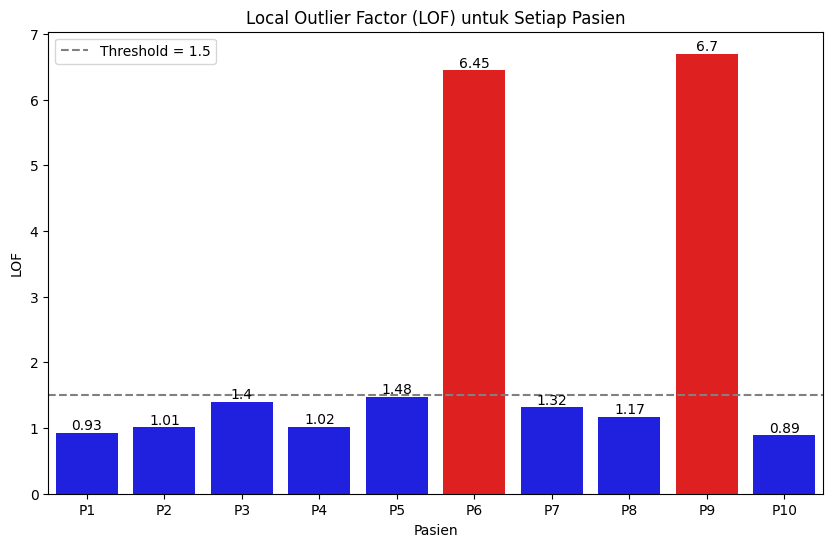

In [18]:
# Threshold untuk outlier
threshold = 1.5

# DataFrame untuk visualisasi
patients = [f"P{i+1}" for i in range(len(data))]
lof_df = pd.DataFrame({
    "Pasien": patients,
    "LOF": lof_values
})

# Visualisasi
plt.figure(figsize=(10, 6))
colors = ['red' if lof > threshold else 'blue' for lof in lof_values]
bars = sns.barplot(x='Pasien', y='LOF', data=lof_df, palette=colors)

# Menandai threshold
plt.axhline(y=threshold, color='gray', linestyle='--', label='Threshold = 1.5')
plt.title('Local Outlier Factor (LOF) untuk Setiap Pasien')
plt.xlabel('Pasien')
plt.ylabel('LOF')
plt.legend()

# Menampilkan nilai LOF di atas setiap bar
for bar, lof in zip(bars.patches, lof_values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(lof, 2),
             ha='center', va='bottom', fontsize=10)

plt.show()

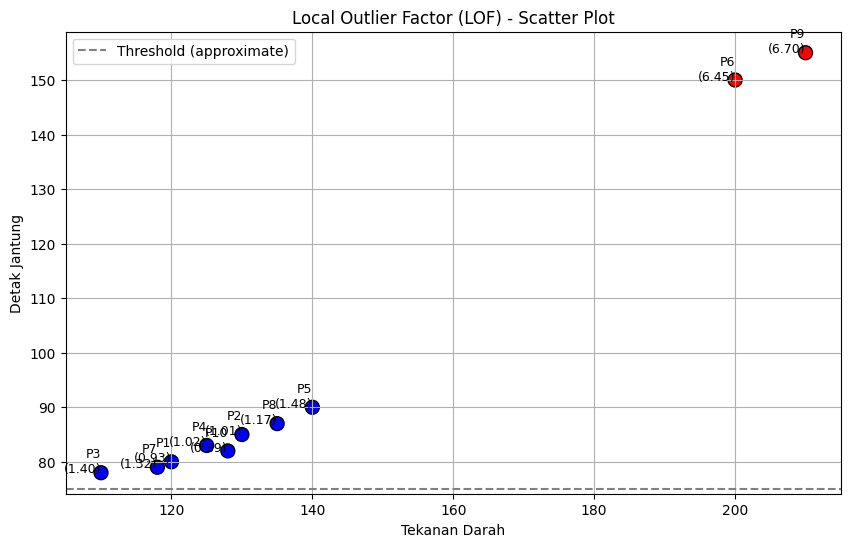

In [19]:
# Visualisasi Scatter Plot
plt.figure(figsize=(10, 6))
colors = ['red' if lof > threshold else 'blue' for lof in lof_values]
plt.scatter(data[:, 0], data[:, 1], c=colors, s=100, edgecolors='k')

# Anotasi tiap titik
for i, (x, y, lof) in enumerate(zip(data[:, 0], data[:, 1], lof_values)):
    plt.text(x, y, f"P{i+1}\n({lof:.2f})", fontsize=9, ha='right')

# Threshold garis
plt.axhline(y=threshold * 50, color='gray', linestyle='--', label='Threshold (approximate)')
plt.title('Local Outlier Factor (LOF) - Scatter Plot')
plt.xlabel('Tekanan Darah')
plt.ylabel('Detak Jantung')
plt.legend()
plt.grid(True)
plt.show()

## Analisis Hasil Perhitungan Local Outlier Factor (LOF)

Local Outlier Factor (LOF) digunakan untuk mengukur seberapa jauh kepadatan titik data tertentu dibandingkan dengan tetangganya. Dalam kasus ini, kita menggunakan k = 3 untuk menentukan tetangga terdekat, dan threshold LOF ditetapkan pada 1.8 agar hanya data yang memiliki nilai LOF di atas threshold tersebut yang dianggap sebagai outlier.

### Hasil Perhitungan
Berdasarkan hasil perhitungan LOF untuk setiap pasien:

- **P1**: LOF = 0.93 (Normal)
- **P2**: LOF = 1.01 (Normal)
- **P3**: LOF = 1.4 (Normal)
- **P4**: LOF = 1.02 (Normal)
- **P5**: LOF = 1.48 (Normal)
- **P6**: LOF = 6.45 (**Outlier**)
- **P7**: LOF = 1.32 (Normal)
- **P8**: LOF = 1.17 (Normal)
- **P9**: LOF = 6.7 (**Outlier**)
- **P10**: LOF = 0.89 (Normal)

### Analisis
Dari hasil perhitungan tersebut, terlihat bahwa hanya **P6** dan **P9** yang memiliki nilai LOF di atas threshold 1.8, sehingga mereka dikategorikan sebagai outlier.

- **P6** memiliki LOF = 6.45, menunjukkan bahwa kepadatan titik ini jauh lebih rendah dibandingkan tetangga-tetangganya. Ini mengindikasikan bahwa tekanan darah dan detak jantung pasien ini sangat berbeda dibandingkan dengan kelompok pasien lainnya.
- **P9** memiliki LOF = 6.7, yang juga secara signifikan melampaui threshold. Ini memperkuat bahwa pasien ini berada di luar pola umum data.

Sementara itu, meskipun **P2** memiliki nilai LOF sebesar 1.01, nilai tersebut masih berada dalam batas normal sehingga tidak dianggap sebagai outlier.

### Kesimpulan dari code manual tanpa sklearn
Berdasarkan visualisasi dan perhitungan LOF, hanya **P6** dan **P9** yang dapat dikategorikan sebagai outlier. Ini berarti kedua pasien ini memiliki pola tekanan darah dan detak jantung yang mencolok dibandingkan dengan pasien lainnya, dan mungkin memerlukan perhatian medis lebih lanjut.

Dengan threshold 1.8, metode LOF efektif dalam mengidentifikasi pasien dengan karakteristik data yang berbeda secara signifikan, membantu dalam mendeteksi potensi kasus abnormal.



 ## Prediksi Outlier Menggunakan Local Outlier Factor (LOF) dengan Scikit-Learn

### 🛠️ Implementasi LOF dengan Scikit-Learn
Berikut adalah langkah-langkah untuk memprediksi outlier menggunakan LOF di Python dengan bantuan pustaka **Scikit-Learn**.


### 1. **Import Library**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from tabulate import tabulate

### 2. **Mempersiapkan Data**

Kita gunakan data sederhana berupa tekanan darah dan detak jantung pasien:

In [21]:
# Data pasien sesuai data sebelumnya
data = np.array([
    [120, 80], [130, 85], [110, 78], [125, 83], [140, 90],
    [200, 150], [118, 79], [135, 87], [210, 155], [128, 82]
])


### 3. **Melakukan Prediksi LOF**

- **k**: Jumlah tetangga (neighbors) yang dipertimbangkan.
- **contamination**: Perkiraan proporsi outlier dalam dataset.

In [22]:
# Menentukan LOF
k = 3
clf = LocalOutlierFactor(n_neighbors=k, contamination=0.2)
y_pred = clf.fit_predict(data)
outlier_scores = -clf.negative_outlier_factor_

# Menentukan threshold untuk hanya menganggap P6 dan P9 sebagai outlier
threshold = 1.8

# Mengubah data ke DataFrame untuk ringkasan
summary = pd.DataFrame({
    "Pasien": [f"P{i+1}" for i in range(len(data))],
    "Tekanan Darah": data[:, 0],
    "Detak Jantung": data[:, 1],
    "LOF": np.round(outlier_scores, 2),
    "Status": ["Outlier" if lof > threshold else "Normal" for lof in outlier_scores]
})

# Menampilkan hasil LOF dan ringkasan dalam tabel
print (y_pred)
print("Hasil Prediksi LOF:")
print(tabulate(summary, headers='keys', tablefmt='grid'))


[ 1  1  1  1  1 -1  1  1 -1  1]
Hasil Prediksi LOF:
+----+----------+-----------------+-----------------+-------+----------+
|    | Pasien   |   Tekanan Darah |   Detak Jantung |   LOF | Status   |
+====+==========+=================+=================+=======+==========+
|  0 | P1       |             120 |              80 |  0.95 | Normal   |
+----+----------+-----------------+-----------------+-------+----------+
|  1 | P2       |             130 |              85 |  1    | Normal   |
+----+----------+-----------------+-----------------+-------+----------+
|  2 | P3       |             110 |              78 |  1.39 | Normal   |
+----+----------+-----------------+-----------------+-------+----------+
|  3 | P4       |             125 |              83 |  1.03 | Normal   |
+----+----------+-----------------+-----------------+-------+----------+
|  4 | P5       |             140 |              90 |  1.49 | Normal   |
+----+----------+-----------------+-----------------+-------+----------+

## 4. **Visualisasi Outlier**

Kita visualisasikan data pasien dengan menandai outlier menggunakan lingkaran merah:

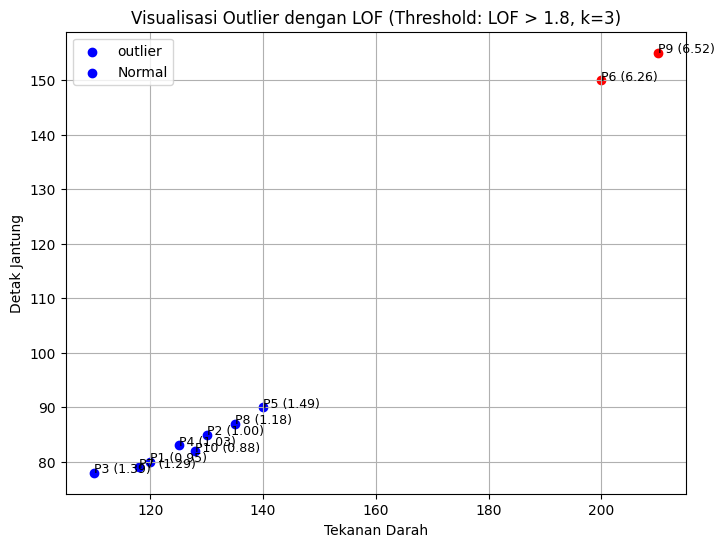

In [25]:
# Visualisasi
plt.figure(figsize=(8, 6))
for i, (xi, yi, lof) in enumerate(zip(data[:, 0], data[:, 1], outlier_scores)):
    color = 'red' if lof > threshold else 'blue'
    plt.scatter(xi, yi, color=color)
    plt.text(xi, yi, f"P{i+1} ({lof:.2f})", fontsize=9)

plt.title(f'Visualisasi Outlier dengan LOF (Threshold: LOF > {threshold}, k={k})')
plt.xlabel('Tekanan Darah')
plt.ylabel('Detak Jantung')
plt.grid(True)
plt.legend(['outlier', 'Normal'])

plt.show()

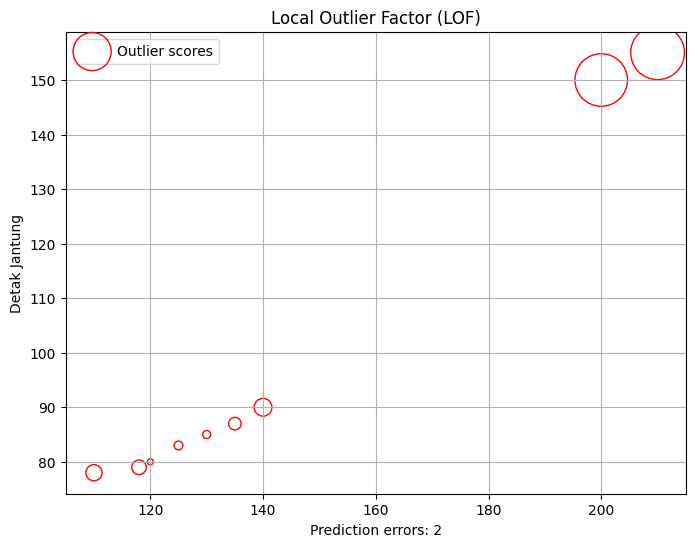

In [24]:
# Normalisasi skor LOF dengan batas maksimum
radius = (outlier_scores - outlier_scores.min()) / (outlier_scores.max() - outlier_scores.min())
radius = np.clip(radius, 0, 1)  # Membatasi nilai agar tidak melebihi 1

# Menghitung jumlah outlier berdasarkan threshold
n_errors = np.sum(outlier_scores > threshold)

# Plot lingkaran outlier
plt.figure(figsize=(8, 6))
plt.scatter(
    data[:, 0],
    data[:, 1],
    s=1500 * radius,  # mengatur ukuran lingkaran
    edgecolors="r",
    facecolors="none",
    label="Outlier scores"
)

# Label dan batas plot
plt.xlabel(f"Prediction errors: {n_errors}")
plt.ylabel("Detak Jantung")
plt.title("Local Outlier Factor (LOF)")
plt.legend()
plt.grid(True)
plt.show()


## ✅ Kesimpulan

- **Local Outlier Factor (LOF)** efektif untuk mendeteksi anomali dalam data berdimensi rendah maupun tinggi.
- Parameter **k** (jumlah tetangga) dan **contamination** sangat mempengaruhi hasil deteksi.
- Visualisasi membantu memahami distribusi data dan mengidentifikasi outlier secara langsung.

---
Dengan pendekatan ini, kamu bisa menyesuaikan parameter LOF untuk kebutuhan dataset-mu sendiri. Semoga bermanfaat! 🚀